In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"hishamakram125","key":"a8d818ec03f4097830fc4364acad7e47"}'}

In [0]:
!pip install kaggle


In [0]:
!ls -a

 .   ..   .config   .kaggle  'kaggle (1).json'	 kaggle.json   sample_data


In [0]:
!mkdir .kaggle


mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
!ls -a

 .   ..   .config   .kaggle  'kaggle (1).json'	 kaggle.json   sample_data


In [0]:
import json
token = {"username":"hishamakram125","key":"a8d818ec03f4097830fc4364acad7e47"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [0]:
!cp /content/.kaggle/kaggle.json ~/root/.kaggle/kaggle.json


cp: cannot create regular file '/root/root/.kaggle/kaggle.json': No such file or directory


In [0]:
!kaggle config set -n path -v{/content}


- path is now set to: {/content}


In [0]:
!kaggle datasets download -d snap/amazon-fine-food-reviews -p /content


 95% 239M/251M [00:01<00:00, 176MB/s]
100% 251M/251M [00:01<00:00, 151MB/s]


In [0]:
!kaggle datasets download -d benhamner/nips-papers -p /content

 95% 134M/141M [00:00<00:00, 226MB/s]
100% 141M/141M [00:00<00:00, 219MB/s]


In [0]:
!unzip \*.zip


Archive:  amazon-fine-food-reviews.zip
replace Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Reviews.csv             
replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: database.sqlite         
replace hashes.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: hashes.txt              

Archive:  nips-papers.zip
replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: database.sqlite         
  inflating: papers.csv              y

  inflating: paper_authors.csv       
  inflating: authors.csv             

2 archives were successfully processed.


In [0]:
import pandas as pd
papers = pd.read_csv('papers.csv')
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [0]:
# Remove the columns
papers = papers.drop(['id','event_type','pdf_name'],axis=1)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [0]:
# Group the papers by year
groups = papers['year'].groupby(papers.year)



# Determine the size of each group
counts = groups.agg('count')



# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline


(array([ 7., 13.,  3.,  2.,  2.,  2.,  0.,  0.,  1.,  1.]),
 array([ 90. , 148.9, 207.8, 266.7, 325.6, 384.5, 443.4, 502.3, 561.2,
        620.1, 679. ]),
 <a list of 10 Patch objects>)

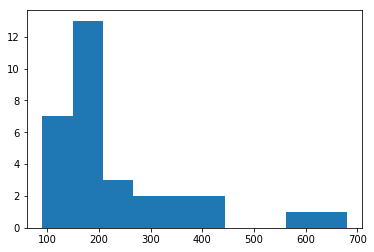

In [0]:
import matplotlib.pyplot as plt

plt.hist(counts)

In [0]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(papers['title'].head())

# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].apply(lambda x: x.lower())
# Print the processed titles of the first rows 
print(papers['title_processed'].head())

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object
0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object


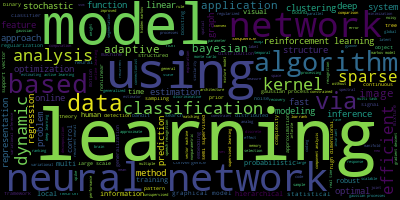

In [0]:
# Import the wordcloud library
import wordcloud
# Join the different processed titles together.
long_string = ' '.join(x for x in papers['title_processed'])

# Create a WordCloud object
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
  (0, 4380)	1
  (0, 3394)	1
  (0, 300)	1
  (0, 1186)	1
  (0, 233)	1
  (1, 2888)	1
  (1, 1818)	1
  (1, 4974)	1
  (1, 2612)	1
  (1, 2505)	1
  (1, 5298)	1
  (1, 1097)	1
  (1, 232)	1
  (1, 280)	1
  (1, 3199)	1
  (1, 3198)	1
  (2, 300)	1
  (2, 4720)	1
  (2, 1114)	1
  (2, 2754)	1
  (2, 4950)	1
  (2, 3695)	1
  (2, 1275)	1
  (2, 4871)	1
  (2, 4734)	1
  :	:
  (7237, 5249)	1
  (7237, 4663)	1
  (7237, 860)	1
  (7238, 3199)	1
  (7238, 3962)	1
  (7238, 5007)	1
  (7238, 792)	1
  (7238, 801)	1
  (7238, 1599)	1
  (7239, 3033)	1
  (7239, 2631)	1
  (7239, 3076)	1
  (7239, 762)	1
  (7239, 136

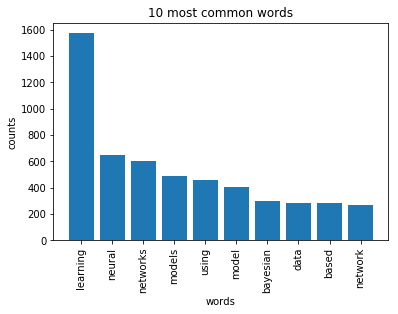

In [0]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
print(count_vectorizer)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])
print(count_data)
# Visualise the 10 most common words
plot_10_most_common_words(count_data,count_vectorizer)


In [0]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
large scale learning data bayesian models field model probabilistic pca

Topic #1:
learning multi sparse efficient optimization methods convex binary bounds distributions

Topic #2:
learning models vector inference latent supervised support order machines classification

Topic #3:
gaussian process learning processes systems matrix dynamic multi recognition speech

Topic #4:
networks neural learning deep network recurrent using unsupervised training convolutional

Topic #5:
learning based model non decision games local making reduction framework

Topic #6:
learning visual gradient recognition neural human models stochastic descent images

Topic #7:
analysis inference models learning algorithms convergence time complexity optimization sample

Topic #8:
markov learning random model boosting kernels analog fields using neural

Topic #9:
estimation structured learning information prediction models using dimensional high maximum


In [0]:
# The historical data indicates that:
more_papers_published_in_2018 = ...